In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string

import regex as re
from collections import Counter

import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk import chunk
from nltk.corpus import treebank_chunk

from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

import os
from os import path

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-302029deb2a4>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm_notebook().pandas()


C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
if os.path.isfile('qis_features.csv'):
    df = pd.read_csv("qis_features.csv")
    df = df.iloc[:,1:]
else:
    df = pd.read_csv("train.csv")

df.head()

,qid,question_text,target,qtnlen,unqwrds,punct,nmbrs,unqwrds_qtnlen,punct_qtnlen,nmbrs_qtnlen,nouns,adjs,verbs,gpe,norp,org,person
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,1,1,0.180556,0.013889,0.013889,4,1,2,1,0,0,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,15,2,0,0.185185,0.024691,0.000000,2,0,7,0,0,0,0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,8,2,0,0.119403,0.029851,0.000000,5,0,4,0,0,0,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,1,0,0.157895,0.017544,0.000000,1,0,2,0,0,0,2
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,1,0,0.194805,0.012987,0.000000,5,1,3,0,0,0,0


### Features

In [3]:
# Qtn length
df['qtnlen'] = df['question_text'].apply(lambda x:len(x))

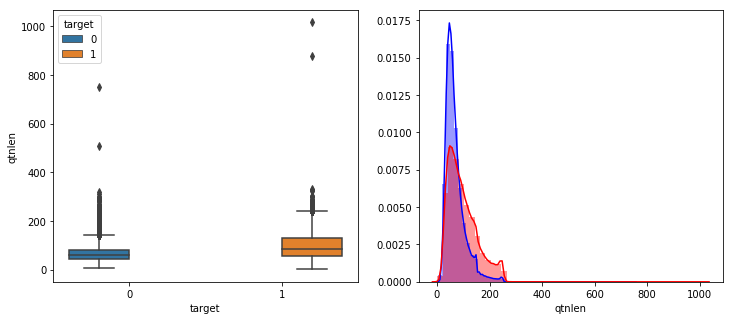

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['qtnlen'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['qtnlen'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['qtnlen'], kde = True, hist=True , color ='red')


<b>Observations:</b>
1. There is overlap in question length distributions of sincere and insincere questions and there is not much of demarcation  
2. Most of the questions have question length of less than 150
3. There are outliers having larger lengths
4. There are more number of Insincere questions having larger lengths


In [5]:
# Unique words
df['unqwrds'] = df['question_text'].apply(lambda x:len(set(x.split(" "))))

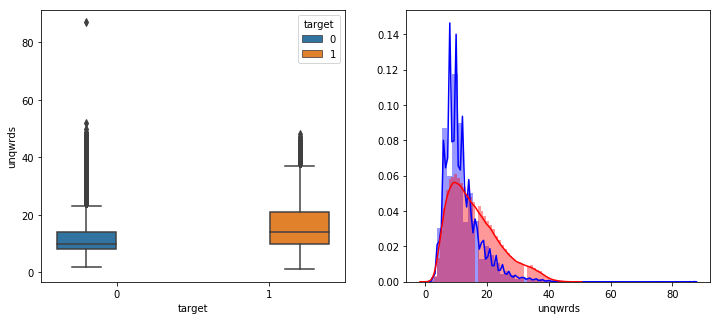

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['unqwrds'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['unqwrds'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['unqwrds'], kde = True, hist=True , color ='red')

<b>Observations:</b>
1. There is overlap in unique words distribution also in sincere and insincere questions and there is not much of demarcation
2. About 25 percentile of the insincere questions have more unique words to that of sincere questions


In [7]:
# punctuations
regex_pnct = r'[!\'\"#$%&\(\)*+,-./:;<=>?@\[\]^_`\{|\}~]+'

df['punct'] = df['question_text'].apply(lambda x:len(re.findall(regex_pnct,x)))

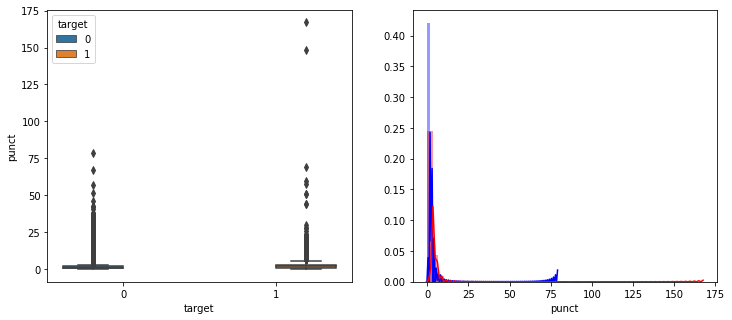

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['punct'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['punct'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['punct'], kde = True, hist=True , color ='red')

In [28]:
for i in range (95,101,1):
    print("Sincere Qtn",i,"percentile:",np.percentile(df[df.target==0]['punct'],i)," punctuations")
    print("Insincere Qtn",i,"percentile:",np.percentile(df[df.target==1]['punct'],i)," punctuations")
    print("----------------------------------------------")

Sincere Qtn 95 percentile: 4.0  punctuations
Insincere Qtn 95 percentile: 6.0  punctuations
----------------------------------------------
Sincere Qtn 96 percentile: 4.0  punctuations
Insincere Qtn 96 percentile: 6.0  punctuations
----------------------------------------------
Sincere Qtn 97 percentile: 5.0  punctuations
Insincere Qtn 97 percentile: 7.0  punctuations
----------------------------------------------
Sincere Qtn 98 percentile: 6.0  punctuations
Insincere Qtn 98 percentile: 7.0  punctuations
----------------------------------------------
Sincere Qtn 99 percentile: 7.0  punctuations
Insincere Qtn 99 percentile: 9.0  punctuations
----------------------------------------------
Sincere Qtn 100 percentile: 79.0  punctuations
Insincere Qtn 100 percentile: 167.0  punctuations
----------------------------------------------


<b>Observations:</b>
1. 95 percentile of the questions have less than 4 or 6 punctuations in them
2. There are just a couple of questions with high punctuations present in them

In [9]:
# numbers

df['nmbrs'] = df['question_text'].apply(lambda x:len(re.findall(r'\d+',x))) 

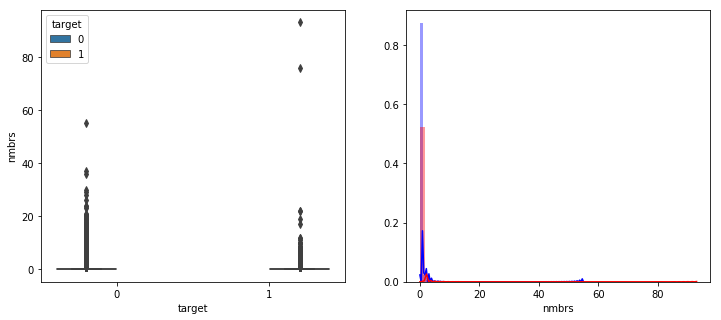

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['nmbrs'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['nmbrs'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['nmbrs'], kde = True, hist=True , color ='red')

In [30]:
for i in range (95,101,1):
    print("Sincere Qtn",i,"percentile:",np.percentile(df[df.target==0]['nmbrs'],i)," numbers")
    print("Insincere Qtn",i,"percentile:",np.percentile(df[df.target==1]['nmbrs'],i)," numbers")
    print("----------------------------------------------")

Sincere Qtn 95 percentile: 1.0  numbers
Insincere Qtn 95 percentile: 1.0  numbers
----------------------------------------------
Sincere Qtn 96 percentile: 1.0  numbers
Insincere Qtn 96 percentile: 1.0  numbers
----------------------------------------------
Sincere Qtn 97 percentile: 2.0  numbers
Insincere Qtn 97 percentile: 1.0  numbers
----------------------------------------------
Sincere Qtn 98 percentile: 2.0  numbers
Insincere Qtn 98 percentile: 2.0  numbers
----------------------------------------------
Sincere Qtn 99 percentile: 3.0  numbers
Insincere Qtn 99 percentile: 2.0  numbers
----------------------------------------------
Sincere Qtn 100 percentile: 55.0  numbers
Insincere Qtn 100 percentile: 93.0  numbers
----------------------------------------------


In [37]:
df[['question_text','target','nmbrs']][df['nmbrs']>50]

,question_text,target,nmbrs
163583,What is [math]\overbrace{\sum_{\vartheta=8}^{\...,1,76
341312,What is the answer to [math]\frac{422}{2262\mi...,0,55
443216,What is [math]\frac{\int_{1x^5}^{3x^{-5}} \tan...,1,93


<b>Observations:</b>
1. 99 percentile of the questions have less than 2 or 3 numbers in them
2. There are few questions with higher count of numbers (Those questions are math related questions)
3. There doesn't seem to be anything insincere in above questions but some are marked as so, seems data has   misclassification/noise

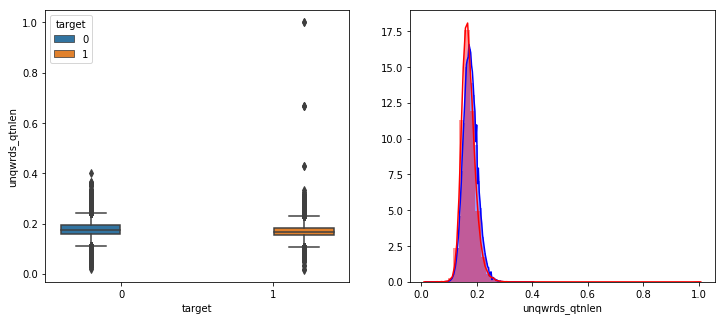

In [38]:
# unqwrds_qtnlen ratio
df['unqwrds_qtnlen'] = df['unqwrds']/df['qtnlen']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['unqwrds_qtnlen'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['unqwrds_qtnlen'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['unqwrds_qtnlen'], kde = True, hist=True , color ='red')


<b>Observations:</b>
1. Distribution of ratios of unq_wrd to qtn_len seems to have complete overlap


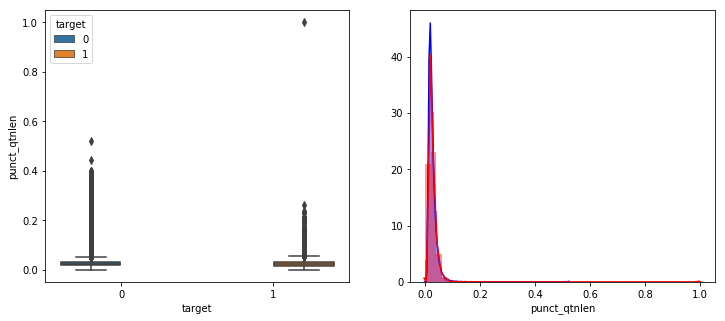

In [12]:
# unqwrds_qtnlen ratio
df['punct_qtnlen'] = df['punct']/df['qtnlen']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['punct_qtnlen'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['punct_qtnlen'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['punct_qtnlen'], kde = True, hist=True , color ='red')

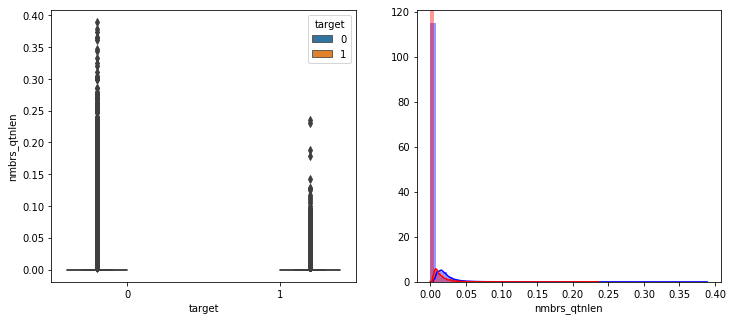

In [13]:
# numbers_qtnlen ratio
df['nmbrs_qtnlen'] = df['nmbrs']/df['qtnlen']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(df['target'],df['nmbrs_qtnlen'],hue=df['target'])

plt.subplot(1,2,2)
sns.distplot(df[df.target==0]['nmbrs_qtnlen'], kde = True, hist=True , color ='blue') 
sns.distplot(df[df.target==1]['nmbrs_qtnlen'], kde = True, hist=True , color ='red')

<b>Observations:</b>
1. All Distributions of ratios seems to have major overlaps

#### NLP Features

In [3]:
import spacy
  
nlp = spacy.load('en_core_web_sm')

In [28]:
'''def extract_pos_ftrs(txt):
    
    str2 = word_tokenize(str(txt))
    pstg = nltk.pos_tag(str2)

    #namedentity = chunk.ne_chunk(pstg, binary=False)
    #lstn = [t for t in namedentity]
    
    dct = Counter([j for i,j in pstg])
        
    Noun_count = dct.get('NNS',0) + dct.get('NN',0) + dct.get('NNP',0) + dct.get('NNPS',0)
    #print(Noun_count)
    
    Adj_count = dct.get('JJ',0) + dct.get('JJR',0) + dct.get('JJS',0)
    
    Verb_count = dct.get('VB',0) + dct.get('VBD',0) + dct.get('VBG',0) + dct.get('VBN',0) + dct.get('VBP',0)
    
    return [Noun_count,Adj_count,Verb_count]

In [11]:
# function to extract NER and pos_tag features
# input: question
# output: list of NER and pos_tag features

def extract_ner_pos_ftrs(txt):
    
    doc = nlp(txt)
    
   
    enty_lbls = [ent.label_ for ent in doc.ents]
    
    gpe_cnt = enty_lbls.count("GPE")
    norp_cnt = enty_lbls.count("NORP")
    org_cnt = enty_lbls.count("ORG")
    prsn_cnt = enty_lbls.count("PERSON")
    
    tkn_lbls = [token.pos_ for token in doc]
    
    nouns_cnt = tkn_lbls.count("NOUN")
    adjs_cnt = tkn_lbls.count("ADJ")
    verbs_cnt = tkn_lbls.count("VERB")
    
    return [gpe_cnt,norp_cnt,org_cnt,prsn_cnt,nouns_cnt,adjs_cnt,verbs_cnt]
    
    

In [29]:
df['gpe'], df['norp'], df['org'], df['person'], df['nouns'], df['adjs'], df['verbs'] = \
zip(*df['question_text'].progress_apply(lambda x:extract_ner_pos_ftrs(x)))

  0%|          | 0/1306122 [00:00<?, ?it/s]

In [ ]:
#df['nouns'] , df['adjs'] , df['verbs']  = zip(*df['question_text'].progress_apply(lambda x:extract_pos_ftrs(x)))
#print(df)

  0%|          | 0/1306122 [00:00<?, ?it/s]

In [39]:
#df['gpe'], df['norp'], df['org'], df['person'] = zip(*df['question_text'].progress_apply(lambda x:extract_ner_ftrs(x)))

In [40]:
df.head()

,Unnamed: 0,qid,question_text,target,qtnlen,unqwrds,punct,nmbrs,unqwrds_qtnlen,punct_qtnlen,nmbrs_qtnlen,nouns,adjs,verbs,gpe,norp,org,person
0,0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,1,1,0.180556,0.013889,0.013889,4,1,2,1,0,0,0
1,1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,15,2,0,0.185185,0.024691,0.000000,2,0,7,0,0,0,0
2,2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,8,2,0,0.119403,0.029851,0.000000,5,0,4,0,0,0,0
3,3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,1,0,0.157895,0.017544,0.000000,1,0,2,0,0,0,2
4,4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,1,0,0.194805,0.012987,0.000000,5,1,3,0,0,0,0


In [4]:
# Corelation among features

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,target,qtnlen,unqwrds,punct,nmbrs,unqwrds_qtnlen,punct_qtnlen,nmbrs_qtnlen,nouns,adjs,verbs,gpe,norp,org,person
target,1,0.18,0.17,0.11,-0.022,-0.069,-0.014,-0.036,0.038,0.13,0.15,0.067,0.3,-0.0051,0.079
qtnlen,0.18,1,0.96,0.57,0.16,-0.36,-0.21,-0.005,0.7,0.57,0.75,0.14,0.16,0.14,0.096
unqwrds,0.17,0.96,1,0.54,0.18,-0.14,-0.22,0.029,0.67,0.55,0.79,0.13,0.13,0.13,0.083
punct,0.11,0.57,0.54,1,0.36,-0.21,0.56,0.21,0.38,0.28,0.43,0.1,0.086,0.11,0.12
nmbrs,-0.022,0.16,0.18,0.36,1,0.068,0.25,0.83,0.13,0.041,0.07,0.015,-0.022,0.087,0.022
unqwrds_qtnlen,-0.069,-0.36,-0.14,-0.21,0.068,1,0.1,0.15,-0.27,-0.19,-0.068,-0.066,-0.14,-0.032,-0.064
punct_qtnlen,-0.014,-0.21,-0.22,0.56,0.25,0.1,1,0.33,-0.18,-0.17,-0.13,-0.017,-0.038,0.0032,0.056
nmbrs_qtnlen,-0.036,-0.005,0.029,0.21,0.83,0.15,0.33,1,1.8e-05,-0.041,-0.034,-0.01,-0.036,0.051,0.0026
nouns,0.038,0.7,0.67,0.38,0.13,-0.27,-0.18,1.8e-05,1,0.36,0.37,-0.03,-0.0097,-0.0072,-0.077
adjs,0.13,0.57,0.55,0.28,0.041,-0.19,-0.17,-0.041,0.36,1,0.33,0.0081,0.17,-0.027,-0.051


<b>Observations:</b>
1. norp feature has highest correlation to target
2. Others have slight correaltion with target but not much
3. pos_tag features have correlated to qtn_len, unqwrds , punct features
4. It will be good to use pos_tag features along with ratios (correlation with ratios is low)


In [31]:
# Saving features to csv file

df.to_csv('qis_features.csv')

In [6]:
df1 = pd.read_csv('qis_features.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 18 columns):
Unnamed: 0        1306122 non-null int64
qid               1306122 non-null object
question_text     1306122 non-null object
target            1306122 non-null int64
qtnlen            1306122 non-null int64
unqwrds           1306122 non-null int64
punct             1306122 non-null int64
nmbrs             1306122 non-null int64
unqwrds_qtnlen    1306122 non-null float64
punct_qtnlen      1306122 non-null float64
nmbrs_qtnlen      1306122 non-null float64
nouns             1306122 non-null int64
adjs              1306122 non-null int64
verbs             1306122 non-null int64
gpe               1306122 non-null int64
norp              1306122 non-null int64
org               1306122 non-null int64
person            1306122 non-null int64
dtypes: float64(3), int64(13), object(2)
memory usage: 179.4+ MB
